<a href="https://colab.research.google.com/github/hasdasda/HoctheoPhamDinhKhanh/blob/main/MoncoHuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
%cd drive/My\ Drive
%cd VNPT
%cd VNPT_01

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/.shortcut-targets-by-id/1UnC-iLs86hXm-MhLt4GMg_ua_MKNBL4I/VNPT/VNPT_01
[Errno 2] No such file or directory: 'VNPT'
/content/drive/.shortcut-targets-by-id/1UnC-iLs86hXm-MhLt4GMg_ua_MKNBL4I/VNPT/VNPT_01
[Errno 2] No such file or directory: 'VNPT_01'
/content/drive/.shortcut-targets-by-id/1UnC-iLs86hXm-MhLt4GMg_ua_MKNBL4I/VNPT/VNPT_01


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/VNPT/VNPT_01"

/content/drive/.shortcut-targets-by-id/1UnC-iLs86hXm-MhLt4GMg_ua_MKNBL4I/VNPT/VNPT_01


In [ ]:
#Bước 1: Import thư viện
import pandas as pd
import numpy as np
from math import floor
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Các thư viện cần thiết để train model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Conv1D

import sys
from os import mkdir
from os.path import exists as path_exists
from os.path import join
import time

import keras
from keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

from tqdm import tqdm

# Data Pre-processing


In [ ]:
#Bước 2: Đọc file đầu vào
#Nếu file input là file excel thì thay read_csv bằng read_excel
#header chỉ dòng chứa tên các features, index_col chỉ cột chứa số thứ tự các mẫu đầu vào
#Nếu có header/index đặt giá trị biến = 0, nếu không đặt = None
data = pd.read_csv('IoTID20.csv', header=0, index_col=None)

In [ ]:
data

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


In [ ]:
# Thay thế các giá trị infinity bằng các giá trị na
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna() # Loại bỏ các giá trị na

In [ ]:
data

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


In [ ]:
#Khởi tạo biến thư viện
encoder = LabelEncoder()
#Cho thuật toán đọc các nhãn các loại tấn công
#Ở đây ta chỉ làm bài toán phân loại 2 lớp: Anomaly và Normal
encoder.fit(data.iloc[:,-3])
encoder.classes_
#Nếu tại đây ta sử dụng câu lệnh transform thì nhãn DoS sẽ có label 0, MITM label1,
#Mirai-Ackflooding label 2, ... Normal label 6
#Để Normal có nhãn 0 ta sắp xếp lại thứ tự các class
#Normal label 0, DoS label 1, Mirai label 2-5, MITM label 6, Scan label 7-8
# encoder.classes_ = np.array(['Normal', 'DoS-Synflooding', 'Mirai-Ackflooding',
#         'Mirai-HTTP Flooding', 'Mirai-Hostbruteforceg', 'Mirai-UDP Flooding',
#         'MITM ARP Spoofing', 'Scan Hostport', 'Scan Port OS'])
#Label chuyển từ dạng chữ sang dạng số
y = encoder.transform(data.iloc[:,-3])

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
#Loại bỏ ip, timestamp, ID ra khỏi data X
X = pd.concat([data.iloc[:,2], data.iloc[:,4:6], data.iloc[:,7:-3]], axis = 1)

In [ ]:
#Bước 3: Cắt lấy file train và file test
#Trong VD này, ta lấy 1/3 số mẫu của tất cả các label
#Khi cắt cần đảm bảo số mẫu của từng label không quá chênh lệch, quá nhỏ
#Cắt data ra làm 2 phần, train chiếm 70%, test chiếm 30% => Train_size = 1/3*0.7=7/30, test_size = 1/3*0.3=0.1
from sklearn.model_selection import train_test_split
#X_train và X_test là các features, y_train và y_test lần lượt là nhãn bộ train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=7/30, test_size=0.1,shuffle=True)




In [ ]:
#Bước 4: Chuẩn hóa dữ liệu
#X = (x-xmin)/(xmax-xmin)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
#Với bộ dữ liệu VD, 2 cột đầu tiên của data là port number, có giá trị từ 0-65535.
scaler.data_max_[0:2] = np.array([65535, 65535])
scaler.data_min_[0:2] = np.array([0, 0])

#Chuẩn hóa dữ liệu
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

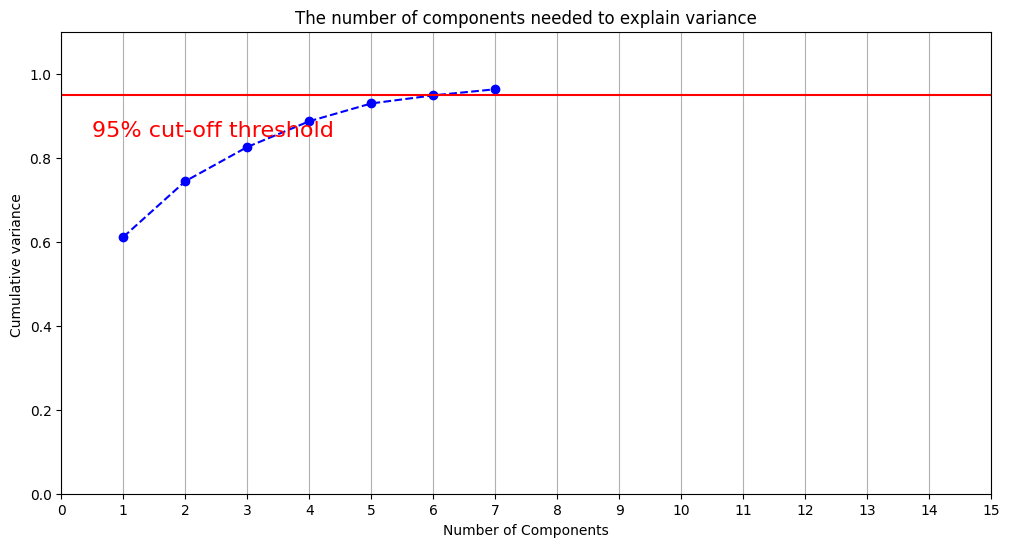

In [ ]:
pca = PCA(n_components = 0.95)
pca.fit(X_train_norm)
X_train_norm_reduce = pca.transform(X_train_norm)
X_test_norm_reduce = pca.transform(X_test_norm)
pca.components_

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 8, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 16, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance ')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()



In [ ]:
# The shape of data before using PCA
print(X_train_norm.shape)
# The shape of data after using PCA
print(X_train_norm_reduce.shape)
#print(y)

(145930, 79)
(145930, 7)


In [ ]:
X_test_norm_reduce.shape

(62542, 7)

# Train model

In [ ]:
# Định nghĩa các biến
# Số nốt ở lớp input của mạng NN (khi chưa áp dụng PCA)
input_shp = X_train_norm.shape[1]
# Số nốt ở lớp input của mạng NN (khi áp dụng PCA)
input_shp_pca = X_train_norm_reduce.shape[1]
# Số node ở đầu ra của mạng NN = số lớp cần phân loại
no_label = len(set(y_train))
# Library np.eye returns a 2-D array with ones on the diagonal and zeros elsewhere.
I = np.eye(no_label)
#output_shp = I[y_train,:].shape

In [ ]:
I

array([[1., 0.],
       [0., 1.]])

## Simple ANN


In [ ]:
# Viết hàm cho neural network với các feed forward-layers đơn giản
def simpleANN(input_shape):
  x = Sequential()
  x.add(Dense(1, kernel_initializer='random_normal', input_dim=input_shape)) #Hidden layer với 1 nodes linear
  #x.add(Dense(20, activation='relu')) # Thêm 1 hidden layer với 10 nodes
  #x.add(Dense(number_of_label, activation='softmax', kernel_initializer='random_normal')) #Output layer, số nodes bằng với số labels
  x.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal')) #Output layer, số nodes bằng 1 ứng với bài toán phân loại 2 lớp
  return x

In [ ]:
# Train model với data chưa qua PCA
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = simpleANN(input_shp)
#adamopt = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
sgdopt = tf.keras.optimizers.SGD(learning_rate=1.0)
model.summary()
model.compile(loss='binary_crossentropy', optimizer=sgdopt, metrics=['accuracy']) #Hàm loss: crossentropy, hàm tối ưu adam
result = model.fit(X_train_norm, y_train, epochs = 100, batch_size = 1024, callbacks=[callback]) #Train mạng neuron

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82 (328.00 B)

 Trainable params: 82 (328.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9313 - loss: 0.2441
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9474 - loss: 0.1472
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9447 - loss: 0.1468
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9448 - loss: 0.1422
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9439 - loss: 0.1373
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9437 - loss: 0.1410
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9429 - loss: 0.1374
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9421 - loss: 0.1370
Epoch 9/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9425 - loss: 0.1370
Epoch 10/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9419 - loss: 0.1380
Epoch 11/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9420 - loss: 0.1336
Epoch 12/100
143/143 ━━━━━━━━━━━━━━━━━━━━

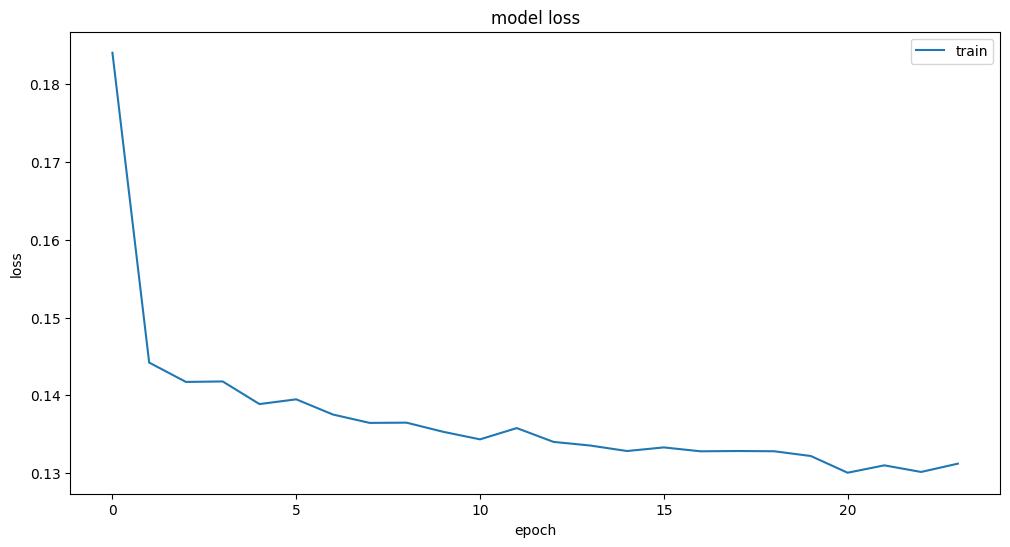

In [ ]:
plt.plot(result.history['loss'])
#plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_norm[:,:])
y_train_pred.shape

4561/4561 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


(145930, 1)

In [ ]:
error_thresh = 0.5

In [ ]:
y_test_pred = model.predict(X_test_norm)
mae_vector = np.sqrt(np.mean((y_test_pred - X_test_norm) ** 2, axis=1))
anomalies = (mae_vector > error_thresh)

np.count_nonzero(anomalies) / len(anomalies)

1955/1955 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


0.01888331041540085

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, anomalies))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     58417
           1       0.76      0.22      0.34      4125

    accuracy                           0.94     62542
   macro avg       0.85      0.61      0.65     62542
weighted avg       0.93      0.94      0.93     62542



In [ ]:
# Viết hàm cho neural network với các feed forward-layers đơn giản
def simpleANN(input_shape):
  x = Sequential()
  x.add(Dense(20, activation='relu', kernel_initializer='random_normal', input_dim=input_shape)) #Hidden layer với 1 nodes linear
  #x.add(Dense(20, activation='relu')) # Thêm 1 hidden layer với 10 nodes
  #x.add(Dense(number_of_label, activation='softmax', kernel_initializer='random_normal')) #Output layer, số nodes bằng với số labels
  x.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal')) #Output layer, số nodes bằng 1 ứng với bài toán phân loại 2 lớp
  return x

In [ ]:
# Train model với data chưa qua PCA
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = simpleANN(input_shp_pca)
#adamopt = tf.keras.optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
sgdopt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.summary()
model.compile(loss='binary_crossentropy', optimizer=sgdopt, metrics=['accuracy']) #Hàm loss: crossentropy, hàm tối ưu adam
result = model.fit(X_train_norm_reduce, y_train, epochs = 500, batch_size = 1024, callbacks=[callback]) #Train mạng neuron

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 20)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9068 - loss: 0.6303
Epoch 2/500
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9363 - loss: 0.4562
Epoch 3/500
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9356 - loss: 0.3665
Epoch 4/500
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9370 - loss: 0.3140
Epoch 5/500
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9357 - loss: 0.2852
Epoch 6/500
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9363 - loss: 0.2648
Epoch 7/500
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9361 - loss: 0.2522
Epoch 8/500
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9360 - loss: 0.2436
Epoch 9/500
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9363 - loss: 0.2368
Epoch 10/500
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9364 - loss: 0.2322
Epoch 11/500
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9361 - loss: 0.2293
Epoch 12/500
143/143 ━━━━━━━━━━━━━━━━━━━━

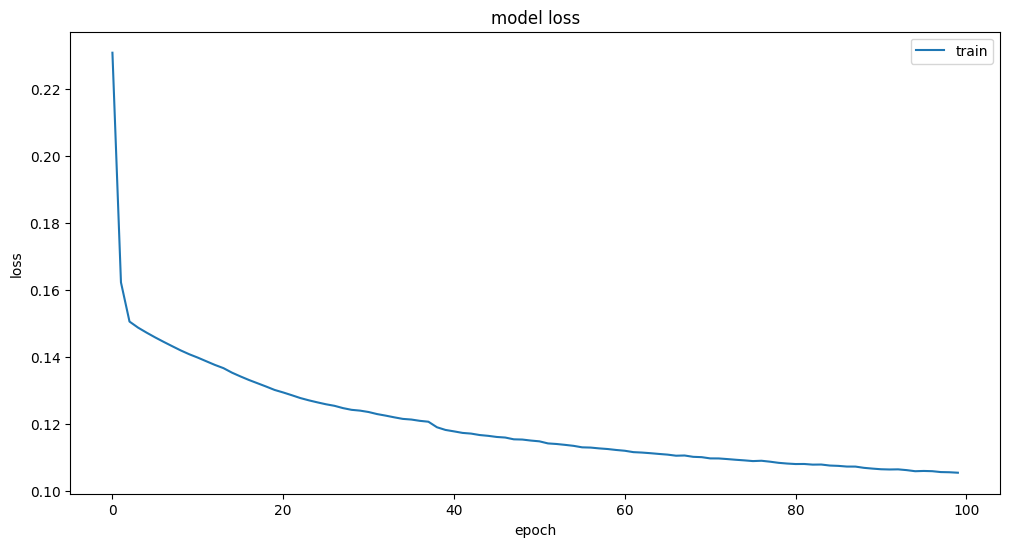

In [ ]:
plt.plot(result.history['loss'])
#plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');
plt.show()

In [ ]:
error_thresh = 0.8

In [ ]:
y_test_pred = model.predict(X_test_norm_reduce)
mae_vector = np.sqrt(np.mean((y_test_pred - X_test_norm_reduce) ** 2, axis=1))
anomalies = (mae_vector > error_thresh)

np.count_nonzero(anomalies) / len(anomalies)

1955/1955 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


0.24545105688977006

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, anomalies))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     58417
           1       0.15      0.57      0.24      4125

    accuracy                           0.76     62542
   macro avg       0.56      0.68      0.55     62542
weighted avg       0.91      0.76      0.82     62542

